# Comparing Changes 

### Mexico level 2 - municipalities & US counties

In [56]:
import geoplanar
import geopandas as gpd
import numpy as np

In [57]:
df = gpd.read_parquet("../geoplanar/datasets/usmex/usmex_1.parquet")
df

,index,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,0,Aguascalientes,MX01,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
1,1,Baja California,MX02,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
2,2,Baja California Sur,MX03,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
3,3,Campeche,MX04,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
4,4,Chiapas,MX07,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,46,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.47_1,Virginia,VA,None,State,State,None,US.VA
77,47,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.48_1,Washington,WA|Wash.,None,State,State,None,US.WA
78,48,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.49_1,West Virginia,WV|W.Va.,None,State,State,None,US.WV
79,49,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.50_1,Wisconsin,WI|Wis.,None,State,State,None,US.WI


In [58]:
df.shape

(81, 25)

In [59]:
df2 = gpd.read_parquet("../geoplanar/datasets/usmex/final_usmex1.parquet")
df2

,index,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,0,Aguascalientes,MX01,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
1,1,Baja California,MX02,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
2,2,Baja California Sur,MX03,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
3,3,Campeche,MX04,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
4,4,Chiapas,MX07,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,46,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.47_1,Virginia,VA,None,State,State,None,US.VA
77,47,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.48_1,Washington,WA|Wash.,None,State,State,None,US.WA
78,48,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.49_1,West Virginia,WV|W.Va.,None,State,State,None,US.WV
79,49,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.50_1,Wisconsin,WI|Wis.,None,State,State,None,US.WI


In [60]:
df2.shape

(81, 25)

In [61]:
# checking for any changes on geometries 
df2['result'] = np.where(df["geometry"] == df2["geometry"], True, False) 

In [62]:
# which geometries are the same in df to df2
df2['result'] 

0      True
1     False
2      True
3     False
4     False
      ...  
76    False
77     True
78    False
79    False
80    False
Name: result, Length: 81, dtype: bool

In [63]:
# number of geometries equal/different bewteen the two df
df2.groupby('result').size() 

result
False    63
True     18
dtype: int64

<AxesSubplot:>

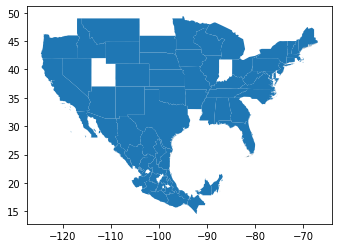

In [64]:
# all counties/municipios that changed
df2.loc[df2['result'] == False].plot() 

<AxesSubplot:>

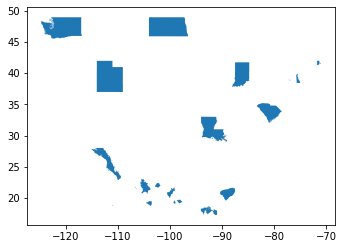

In [65]:
df2.loc[df2['result'] == True].plot()

In [66]:
# checking whether geometries changed in el paso (74)
df.loc[74] 

index                                                        44
ADM1_ES                                                    None
ADM1_PCODE                                                 None
ADM1_REF                                                   None
ADM1ALT1ES                                                 None
ADM1ALT2ES                                                 None
ADM0_ES                                                    None
ADM0_PCODE                                                 None
date                                                       None
validOn                                                    None
validTo                                                    None
Shape_Leng                                                  NaN
Shape_Area                                                  NaN
geometry      POLYGON ((-109.0602417 38.49905014, -109.06024...
COUNTRY                                                      US
GID_0                                   

In [67]:
# checking whether geometries changed in el paso (74)
df2.loc[74]

index                                                        44
ADM1_ES                                                    None
ADM1_PCODE                                                 None
ADM1_REF                                                   None
ADM1ALT1ES                                                 None
ADM1ALT2ES                                                 None
ADM0_ES                                                    None
ADM0_PCODE                                                 None
date                                                       None
validOn                                                    None
validTo                                                    None
Shape_Leng                                                  NaN
Shape_Area                                                  NaN
geometry      POLYGON ((-109.0602417 38.49905014, -109.06024...
COUNTRY                                                      US
GID_0                                   

In [68]:
# which geometries are different
df[df.geometry!=df2.geometry] 

,index,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
1,1,Baja California,MX02,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
3,3,Campeche,MX04,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
4,4,Chiapas,MX07,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
5,5,Chihuahua,MX08,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
6,6,Coahuila de Zaragoza,MX05,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,45,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.46_1,Vermont,VT,None,State,State,None,US.VT
76,46,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.47_1,Virginia,VA,None,State,State,None,US.VA
78,48,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.49_1,West Virginia,WV|W.Va.,None,State,State,None,US.WV
79,49,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.50_1,Wisconsin,WI|Wis.,None,State,State,None,US.WI


In [69]:
# which geometries are equal
df[df.geometry==df2.geometry]

,index,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,0,Aguascalientes,MX01,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
2,2,Baja California Sur,MX03,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
7,7,Colima,MX06,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
8,8,Distrito Federal,MX09,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
17,17,Nayarit,MX18,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
21,21,Querétaro de Arteaga,MX22,Queretaro de Arteaga,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
26,26,Tabasco,MX27,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
28,28,Tlaxcala,MX29,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
30,30,Yucatán,MX31,Yucatan,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
38,7,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.8_1,Delaware,DE|Del.,None,State,State,None,US.DE


In [70]:
# for each aligned geometry equal to other.
df.geometry.geom_equals(df2.geometry).sum() 

76

In [71]:
# if each aligned geometry is approximately equal to other.
df.geometry.geom_almost_equals(df2.geometry).sum() 

18

In [72]:
# all geometries that equal aligned other to a given tolerance, else False.
df.geometry.geom_equals_exact(df2.geometry, tolerance=.001).sum()

18

In [73]:
# symmetric difference of points in each aligned geometry with other.
df.symmetric_difference(df2, align=False)

0     POLYGON EMPTY
1     POLYGON EMPTY
2     POLYGON EMPTY
3     POLYGON EMPTY
4     POLYGON EMPTY
          ...      
76    POLYGON EMPTY
77    POLYGON EMPTY
78    POLYGON EMPTY
79    POLYGON EMPTY
80    POLYGON EMPTY
Length: 81, dtype: geometry

# Checking for contiguity

In [74]:
import libpysal
from libpysal.weights import Queen, Rook
import pandas

## Rook contiguity

In [75]:
w_rook = Rook.from_dataframe(df)

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [76]:
w_rook.n

81

In [77]:
# non-zero entries
w_rook.nonzero

354

In [78]:
# number of joins
w_rook.s0

354.0

In [79]:
# measure of the density of the spatial weights matrix
w_rook.pct_nonzero

5.3955189757658895

In [80]:
# location 0 has the following neighbors
w_rook.neighbors[0] 

[13, 31]

In [81]:
# neighbors for each observation
w_rook.neighbors

{0: [13, 31],
 1: [25, 2],
 2: [1],
 3: [26, 22, 30],
 4: [26, 19, 29],
 5: [24, 9, 6, 25],
 6: [9, 18, 5, 31],
 7: [13, 15],
 8: [16, 14],
 9: [17, 5, 6, 24, 31],
 10: [21, 23, 15, 13, 31],
 11: [16, 19, 20, 14, 15],
 12: [20, 21, 23, 28, 29, 14],
 13: [0, 17, 7, 10, 31, 15],
 14: [8, 11, 12, 15, 16, 20, 21, 28],
 15: [21, 7, 10, 11, 13, 14],
 16: [8, 11, 20, 14],
 17: [24, 9, 13, 31],
 18: [27, 31, 6, 23],
 19: [29, 11, 4, 20],
 20: [16, 29, 19, 11, 12, 28, 14],
 21: [23, 10, 12, 14, 15],
 22: [3, 30],
 23: [18, 21, 10, 27, 12, 29, 31],
 24: [17, 5, 9, 25],
 25: [24, 1, 5],
 26: [3, 4, 29],
 27: [18, 29, 23],
 28: [20, 12, 14],
 29: [19, 4, 20, 23, 26, 27, 12],
 30: [3, 22],
 31: [0, 6, 9, 10, 13, 17, 18, 23],
 32: [72, 41, 40, 54],
 33: [74, 35, 58, 61],
 34: [48, 66, 54, 55, 72, 73],
 35: [33, 58, 67],
 36: [80, 66, 57, 74, 61, 46],
 37: [51, 69, 62],
 38: [50, 68, 60],
 39: [50, 76],
 40: [32, 41],
 41: [32, 70, 40, 72, 63],
 42: [80, 67, 58, 56, 74, 77],
 43: [47, 52, 55, 44, 45,

In [82]:
# full neighbor matrix
pandas.DataFrame(*w_rook.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# weight values
w_rook.weights

{0: [1.0, 1.0],
 1: [1.0, 1.0],
 2: [1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0],
 8: [1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 30: [1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0],
 34: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 35: [1.0, 1.0, 1.0],
 36

In [84]:
# number of neighbors for each observation
w_rook.cardinalities

{0: 2,
 1: 2,
 2: 1,
 3: 3,
 4: 3,
 5: 4,
 6: 4,
 7: 2,
 8: 2,
 9: 5,
 10: 5,
 11: 5,
 12: 6,
 13: 6,
 14: 8,
 15: 6,
 16: 4,
 17: 4,
 18: 4,
 19: 4,
 20: 7,
 21: 5,
 22: 2,
 23: 7,
 24: 4,
 25: 3,
 26: 3,
 27: 3,
 28: 3,
 29: 7,
 30: 2,
 31: 8,
 32: 4,
 33: 4,
 34: 6,
 35: 3,
 36: 6,
 37: 3,
 38: 3,
 39: 2,
 40: 2,
 41: 5,
 42: 6,
 43: 6,
 44: 4,
 45: 6,
 46: 4,
 47: 7,
 48: 3,
 49: 1,
 50: 5,
 51: 5,
 52: 5,
 53: 5,
 54: 4,
 55: 8,
 56: 4,
 57: 6,
 58: 5,
 59: 3,
 60: 3,
 61: 4,
 62: 6,
 63: 4,
 64: 3,
 65: 6,
 66: 6,
 67: 4,
 68: 6,
 69: 2,
 70: 2,
 71: 6,
 72: 8,
 73: 4,
 74: 5,
 75: 3,
 76: 6,
 77: 2,
 78: 5,
 79: 4,
 80: 6}

In [85]:
# overview of the distribution of these cardinalities
w_rook.histogram

[(1, 2), (2, 11), (3, 14), (4, 18), (5, 12), (6, 16), (7, 4), (8, 4)]

The cardinalities and histogram attributes help quickly spot asymmetries in the number of neighbors

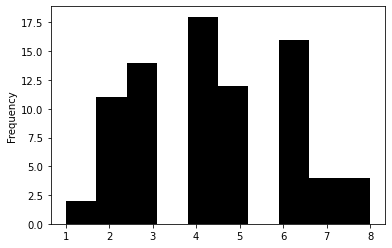

In [86]:
pandas.Series(w_rook.cardinalities).plot.hist(color='k');

In [87]:
w_rook.s0


354.0

## Queen contiguity

In [88]:
w_queen = Queen.from_dataframe(df)

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [89]:
w_queen.n

81

In [90]:
w_queen.n == w_rook.n

True

In [91]:
# non-zero entries
w_queen.nonzero

358

In [92]:
# number of joins
w_queen.s0

358.0

In [93]:
# measure of the density of the spatial weights matrix
w_queen.pct_nonzero

5.4564852918762385

In [94]:
# location 0 has the following neighbors
w_queen.neighbors[0]

[13, 31]

In [95]:
# neighbors for each observation
w_queen.neighbors

{0: [13, 31],
 1: [25, 2],
 2: [1],
 3: [26, 22, 30],
 4: [26, 19, 29],
 5: [24, 9, 6, 25],
 6: [9, 18, 5, 31],
 7: [13, 15],
 8: [16, 14],
 9: [17, 5, 6, 24, 31],
 10: [21, 23, 15, 13, 31],
 11: [16, 19, 20, 14, 15],
 12: [20, 21, 23, 28, 29, 14],
 13: [0, 17, 7, 10, 15, 31],
 14: [8, 11, 12, 15, 16, 20, 21, 28],
 15: [21, 7, 10, 11, 13, 14],
 16: [8, 11, 20, 14],
 17: [24, 9, 13, 31],
 18: [27, 31, 6, 23],
 19: [29, 11, 4, 20],
 20: [16, 29, 19, 11, 12, 28, 14],
 21: [23, 10, 12, 14, 15],
 22: [3, 30],
 23: [18, 21, 10, 27, 12, 29, 31],
 24: [17, 5, 9, 25],
 25: [24, 1, 5],
 26: [3, 4, 29],
 27: [18, 29, 23],
 28: [20, 12, 14],
 29: [19, 4, 20, 23, 26, 27, 12],
 30: [3, 22],
 31: [0, 6, 9, 10, 13, 17, 18, 23],
 32: [72, 41, 40, 54],
 33: [35, 36, 58, 74, 61],
 34: [48, 66, 54, 55, 72, 73],
 35: [33, 58, 67],
 36: [80, 33, 66, 57, 74, 61, 46],
 37: [51, 69, 62],
 38: [50, 68, 60],
 39: [50, 76],
 40: [32, 41],
 41: [32, 70, 40, 72, 63],
 42: [80, 67, 58, 56, 74, 77],
 43: [47, 52, 55,

In [96]:
# full neighbor matrix
pandas.DataFrame(*w_queen.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# weight values
w_queen.weights

{0: [1.0, 1.0],
 1: [1.0, 1.0],
 2: [1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0],
 8: [1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 30: [1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0, 1.0],
 34: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 35: [1.0, 1.0, 1.0]

In [98]:
# number of neighbors for each observation
w_queen.cardinalities

{0: 2,
 1: 2,
 2: 1,
 3: 3,
 4: 3,
 5: 4,
 6: 4,
 7: 2,
 8: 2,
 9: 5,
 10: 5,
 11: 5,
 12: 6,
 13: 6,
 14: 8,
 15: 6,
 16: 4,
 17: 4,
 18: 4,
 19: 4,
 20: 7,
 21: 5,
 22: 2,
 23: 7,
 24: 4,
 25: 3,
 26: 3,
 27: 3,
 28: 3,
 29: 7,
 30: 2,
 31: 8,
 32: 4,
 33: 5,
 34: 6,
 35: 3,
 36: 7,
 37: 3,
 38: 3,
 39: 2,
 40: 2,
 41: 5,
 42: 6,
 43: 6,
 44: 4,
 45: 6,
 46: 4,
 47: 7,
 48: 3,
 49: 1,
 50: 5,
 51: 5,
 52: 5,
 53: 5,
 54: 4,
 55: 8,
 56: 4,
 57: 6,
 58: 5,
 59: 3,
 60: 3,
 61: 5,
 62: 6,
 63: 4,
 64: 3,
 65: 6,
 66: 6,
 67: 4,
 68: 6,
 69: 2,
 70: 2,
 71: 6,
 72: 8,
 73: 4,
 74: 6,
 75: 3,
 76: 6,
 77: 2,
 78: 5,
 79: 4,
 80: 6}

In [99]:
# overview of the distribution of these cardinalities
w_queen.histogram

[(1, 2), (2, 11), (3, 14), (4, 16), (5, 13), (6, 16), (7, 5), (8, 4)]

The cardinalities and histogram attributes help quickly spot asymmetries in the number of neighbors

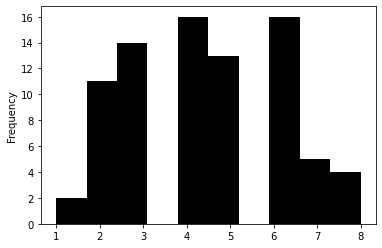

In [100]:
pandas.Series(w_queen.cardinalities).plot.hist(color='k');

In [101]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Contiguity with clean us/mex border file

## Rook contiguity

In [102]:
wr = Rook.from_dataframe(df2)

In [103]:
wr.n

81

In [104]:
# non-zero entries
wr.nonzero

372

In [105]:
# number of joins
wr.s0

372.0

In [106]:
# measure of the density of the spatial weights matrix
wr.pct_nonzero

5.66986739826246

In [107]:
# location 0 has the following neighbors
wr.neighbors[0] 

[13, 31]

In [108]:
# neighbors for each observation
wr.neighbors

{0: [13, 31],
 1: [33, 2, 35, 25],
 2: [1],
 3: [26, 22, 30],
 4: [26, 19, 29],
 5: [73, 6, 24, 9, 61, 25],
 6: [18, 5, 73, 9, 31],
 7: [13, 15],
 8: [16, 14],
 9: [17, 5, 6, 24, 31],
 10: [21, 23, 15, 13, 31],
 11: [16, 19, 20, 14, 15],
 12: [20, 21, 23, 28, 29, 14],
 13: [0, 17, 7, 10, 31, 15],
 14: [8, 11, 12, 15, 16, 20, 21, 28],
 15: [21, 7, 10, 11, 13, 14],
 16: [8, 11, 20, 14],
 17: [24, 9, 13, 31],
 18: [6, 23, 73, 27, 31],
 19: [29, 11, 4, 20],
 20: [16, 29, 19, 11, 12, 28, 14],
 21: [23, 10, 12, 14, 15],
 22: [3, 30],
 23: [18, 21, 10, 27, 12, 29, 31],
 24: [17, 5, 9, 25],
 25: [1, 33, 5, 24, 61],
 26: [3, 4, 29],
 27: [73, 18, 29, 23],
 28: [20, 12, 14],
 29: [19, 4, 20, 23, 26, 27, 12],
 30: [3, 22],
 31: [0, 6, 9, 10, 13, 17, 18, 23],
 32: [72, 41, 40, 54],
 33: [1, 35, 74, 25, 58, 61],
 34: [48, 66, 54, 55, 72, 73],
 35: [1, 58, 67, 33],
 36: [80, 66, 57, 74, 61, 46],
 37: [51, 69, 62],
 38: [50, 68, 60],
 39: [50, 76],
 40: [32, 41],
 41: [32, 70, 40, 72, 63],
 42: [80, 

In [109]:
# full neighbor matrix
pandas.DataFrame(*wr.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
# weight values
wr.weights

{0: [1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0],
 2: [1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0],
 8: [1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 30: [1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 34: [1

In [111]:
# number of neighbors for each observation
wr.cardinalities

{0: 2,
 1: 4,
 2: 1,
 3: 3,
 4: 3,
 5: 6,
 6: 5,
 7: 2,
 8: 2,
 9: 5,
 10: 5,
 11: 5,
 12: 6,
 13: 6,
 14: 8,
 15: 6,
 16: 4,
 17: 4,
 18: 5,
 19: 4,
 20: 7,
 21: 5,
 22: 2,
 23: 7,
 24: 4,
 25: 5,
 26: 3,
 27: 4,
 28: 3,
 29: 7,
 30: 2,
 31: 8,
 32: 4,
 33: 6,
 34: 6,
 35: 4,
 36: 6,
 37: 3,
 38: 3,
 39: 2,
 40: 2,
 41: 5,
 42: 6,
 43: 6,
 44: 4,
 45: 6,
 46: 4,
 47: 7,
 48: 3,
 49: 1,
 50: 5,
 51: 5,
 52: 5,
 53: 5,
 54: 4,
 55: 8,
 56: 4,
 57: 6,
 58: 5,
 59: 3,
 60: 3,
 61: 6,
 62: 6,
 63: 4,
 64: 3,
 65: 6,
 66: 6,
 67: 4,
 68: 6,
 69: 2,
 70: 2,
 71: 6,
 72: 8,
 73: 8,
 74: 5,
 75: 3,
 76: 6,
 77: 2,
 78: 5,
 79: 4,
 80: 6}

In [112]:
# overview of the distribution of these cardinalities
wr.histogram

[(1, 2), (2, 10), (3, 11), (4, 15), (5, 15), (6, 19), (7, 4), (8, 5)]

The cardinalities and histogram attributes help quickly spot asymmetries in the number of neighbors

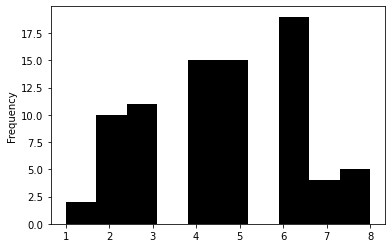

In [113]:
pandas.Series(wr.cardinalities).plot.hist(color='k');

## Queen contigutiy

In [114]:
wq = Queen.from_dataframe(df2)

In [115]:
wq.n

81

In [116]:
wq.n == wr.n

True

In [117]:
# non-zero entries
wq.nonzero

376

In [118]:
# number of joins
wq.s0

376.0

In [119]:
# measure of the density of the spatial weights matrix
wq.pct_nonzero

5.730833714372809

In [120]:
# location 0 has the following neighbors
wq.neighbors[0] 

[13, 31]

In [121]:
# neighbors for each observation
wq.neighbors

{0: [13, 31],
 1: [33, 2, 35, 25],
 2: [1],
 3: [26, 22, 30],
 4: [26, 19, 29],
 5: [6, 9, 24, 73, 61, 25],
 6: [18, 5, 73, 9, 31],
 7: [13, 15],
 8: [16, 14],
 9: [17, 5, 6, 24, 31],
 10: [21, 23, 15, 13, 31],
 11: [16, 19, 20, 14, 15],
 12: [20, 21, 23, 28, 29, 14],
 13: [0, 17, 7, 10, 15, 31],
 14: [8, 11, 12, 15, 16, 20, 21, 28],
 15: [21, 7, 10, 11, 13, 14],
 16: [8, 11, 20, 14],
 17: [24, 9, 13, 31],
 18: [6, 23, 73, 27, 31],
 19: [29, 11, 4, 20],
 20: [16, 29, 19, 11, 12, 28, 14],
 21: [23, 10, 12, 14, 15],
 22: [3, 30],
 23: [18, 21, 10, 27, 12, 29, 31],
 24: [17, 5, 9, 25],
 25: [1, 33, 5, 24, 61],
 26: [3, 4, 29],
 27: [73, 18, 29, 23],
 28: [20, 12, 14],
 29: [19, 4, 20, 23, 26, 27, 12],
 30: [3, 22],
 31: [0, 6, 9, 10, 13, 17, 18, 23],
 32: [72, 41, 40, 54],
 33: [1, 35, 36, 58, 25, 74, 61],
 34: [48, 66, 54, 55, 72, 73],
 35: [1, 58, 67, 33],
 36: [80, 33, 66, 57, 74, 61, 46],
 37: [51, 69, 62],
 38: [50, 68, 60],
 39: [50, 76],
 40: [32, 41],
 41: [32, 70, 40, 72, 63],
 4

In [122]:
# full neighbor matrix
pandas.DataFrame(*wq.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
# weight values
wq.weights

{0: [1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0],
 2: [1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0],
 8: [1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 30: [1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 3

In [124]:
# number of neighbors for each observation
wq.cardinalities

{0: 2,
 1: 4,
 2: 1,
 3: 3,
 4: 3,
 5: 6,
 6: 5,
 7: 2,
 8: 2,
 9: 5,
 10: 5,
 11: 5,
 12: 6,
 13: 6,
 14: 8,
 15: 6,
 16: 4,
 17: 4,
 18: 5,
 19: 4,
 20: 7,
 21: 5,
 22: 2,
 23: 7,
 24: 4,
 25: 5,
 26: 3,
 27: 4,
 28: 3,
 29: 7,
 30: 2,
 31: 8,
 32: 4,
 33: 7,
 34: 6,
 35: 4,
 36: 7,
 37: 3,
 38: 3,
 39: 2,
 40: 2,
 41: 5,
 42: 6,
 43: 6,
 44: 4,
 45: 6,
 46: 4,
 47: 7,
 48: 3,
 49: 1,
 50: 5,
 51: 5,
 52: 5,
 53: 5,
 54: 4,
 55: 8,
 56: 4,
 57: 6,
 58: 5,
 59: 3,
 60: 3,
 61: 7,
 62: 6,
 63: 4,
 64: 3,
 65: 6,
 66: 6,
 67: 4,
 68: 6,
 69: 2,
 70: 2,
 71: 6,
 72: 8,
 73: 8,
 74: 6,
 75: 3,
 76: 6,
 77: 2,
 78: 5,
 79: 4,
 80: 6}

In [125]:
# overview of the distribution of these cardinalities
wq.histogram

[(1, 2), (2, 10), (3, 11), (4, 15), (5, 14), (6, 17), (7, 7), (8, 5)]

The cardinalities and histogram attributes help quickly spot asymmetries in the number of neighbors

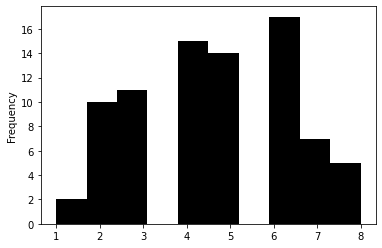

In [126]:
pandas.Series(wq.cardinalities).plot.hist(color='k');